# NAME: **KEVIN JOHNSON**
## TECHNICAL TASK -1 : **Prediction using Supervised ML (Level - Beginner)**
### In this task we will predict the percentage of an student based on the no of study hours. This is a simple linear regression task as it involves just 2 variables.

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics

# **Getting the data from an online source**

In [67]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#**Basic Data Exploration**
In this step, we will perform the below operations to check what the data set comprises of. We will do the following tasks: checking the shape of the dataset, checking info of the dataset and checking the
summary of the dataset.

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Data Visualization**

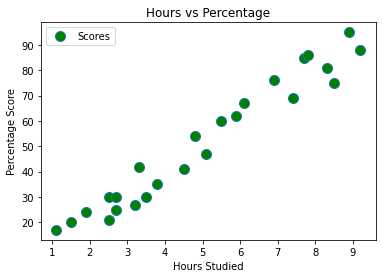

In [15]:
#From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
df.plot(x='Hours', y='Scores', style='o',markersize=10, markerfacecolor='green',)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# **Preparing the data for the Machine learning model**

In [16]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

# **Training the model**
### We split the dataset into test and training data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [42]:
lm = LinearRegression()  
lm.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Displaying the intercept and coefficient**

In [65]:
print('Intercept :',lm.intercept_)
print('Coefficient :',lm.coef_)

Intercept : 2.018160041434662
Coefficient : [9.91065648]


#  **Plotting the regression line**

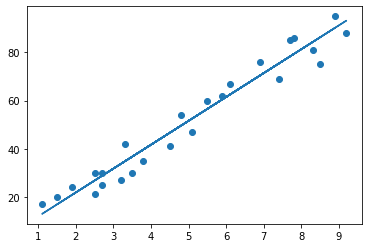

In [43]:

reg_line = lm.coef_*X + lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, reg_line);
plt.show()

# **Making the Predictions**

In [44]:
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# **Actual VS Predicted values**

In [52]:
df1= pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred})  
df1

,Actual_Values,Predicted_Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Displaying the score(accuracy) of the model and also the various metrics in order to evaluate the model**

In [50]:
lm.score(X,y)

0.9526947647057273

In [63]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


# **Predicting Score of the student who studies for 9.25 hours/day**

In [56]:
hours = 9.25
val=np.array([hours])
val=val.reshape(-1,1)
own_pred = lm.predict(val)
#print("No of Hours = {}".format(hours))
print("For 9.25 Hours Predicted Score = {}".format(own_pred[0]))

For 9.25 Hours Predicted Score = 93.69173248737539


# Conclusion
## According to the linear regression model The student who studies for 9.25 hours/day will score 93.69 